# La torre de Hanoi

El objetivo es mover una pila completa de discos desde la posición de origen (primera torre) a la posición de destino (tercera torre). Se siguen tres reglas simples:

1. Solo se puede mover un disco a la vez.

2. Cada movimiento consiste en tomar el disco superior de una de las pilas y colocarlo encima de otra pila. En otras palabras, un disco solo se puede mover si es el disco superior de una pila.

3. No se puede colocar un disco más grande encima de un disco más pequeño.

Pasos para resolver la Torre de Hanoi:
Paso 0: [[3, 2, 1], [], []]
   Mover disco 1 desde la torre 1 a la torre 3
Paso 1: [[3, 2], [], [1]]
   Mover disco 2 desde la torre 1 a la torre 2
Paso 2: [[3], [2], [1]]
   Mover disco 1 desde la torre 3 a la torre 2
Paso 3: [[3], [2, 1], []]
   Mover disco 3 desde la torre 1 a la torre 3
Paso 4: [[], [2, 1], [3]]
   Mover disco 1 desde la torre 2 a la torre 1
Paso 5: [[1], [2], [3]]
   Mover disco 2 desde la torre 2 a la torre 3
Paso 6: [[1], [], [3, 2]]
   Mover disco 1 desde la torre 1 a la torre 3
Paso 7: [[], [], [3, 2, 1]]


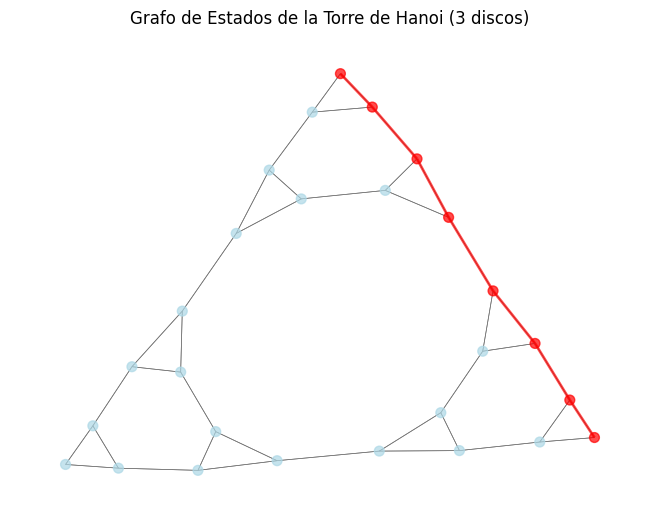

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time

class HanoiGraphVisualizer:
    def __init__(self, num_discos):
        self.num_discos = num_discos
        self.graph = nx.Graph()
        self.states = {}
        self.generate_graph()

    def get_state_tuple(self, torres):
        """Convierte la configuración de las torres en una tupla hashable."""
        return tuple(tuple(torre) for torre in torres)

    def generate_graph(self, n=None, torres=None):
        """Genera el grafo de estados posibles de la Torre de Hanoi."""
        if n is None:
            n = self.num_discos
        if torres is None:
            torres = [[i for i in range(n, 0, -1)], [], []]

        state = self.get_state_tuple(torres)
        if state in self.states:
            return

        self.states[state] = True
        self.graph.add_node(state)

        for origen in range(3):
            if torres[origen]:
                disco = torres[origen][-1]
                for destino in range(3):
                    if origen != destino and (not torres[destino] or disco < torres[destino][-1]):
                        nuevo_torres = [list(t) for t in torres]
                        movido = nuevo_torres[origen].pop()
                        nuevo_torres[destino].append(movido)
                        nuevo_state = self.get_state_tuple(nuevo_torres)
                        self.graph.add_edge(state, nuevo_state)
                        self.generate_graph(n, nuevo_torres)

    def solve_hanoi_graph(self):
        """Encuentra el camino más corto desde el estado inicial al estado final usando BFS."""
        start_state = self.get_state_tuple([list(range(self.num_discos, 0, -1)), [], []])
        end_state = self.get_state_tuple([[], [], list(range(self.num_discos, 0, -1))])

        if start_state not in self.graph or end_state not in self.graph:
            return None

        queue = [(start_state, [start_state])]
        visited = {start_state}

        while queue:
            current_state, path = queue.pop(0)
            if current_state == end_state:
                return path

            for neighbor in self.graph.neighbors(current_state):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, path + [neighbor]))
        return None

    def visualize_graph(self, solution_path=None):
        """Visualiza el grafo de estados y el camino de la solución."""
        pos = nx.spring_layout(self.graph, seed=42)  # Layout para la visualización

        # Colorear el camino de la solución si existe
        node_colors = ['lightblue'] * len(self.graph.nodes)
        if solution_path:
            node_to_index = {node: i for i, node in enumerate(self.graph.nodes)}
            for state in solution_path:
                if state in node_to_index:
                    node_colors[node_to_index[state]] = 'red'

        nx.draw(self.graph, pos, with_labels=False, node_color=node_colors, node_size=50, alpha=0.7, width=0.5)

        # Resaltar el camino de la solución como aristas más gruesas
        if solution_path:
            edge_colors = ['gray'] * len(self.graph.edges)
            edge_widths = [0.5] * len(self.graph.edges)
            edges = list(self.graph.edges)
            for i in range(len(solution_path) - 1):
                u, v = solution_path[i], solution_path[i+1]
                if (u, v) in edges:
                    edge_index = edges.index((u, v))
                    edge_colors[edge_index] = 'red'
                    edge_widths[edge_index] = 2
                elif (v, u) in edges:
                    edge_index = edges.index((v, u))
                    edge_colors[edge_index] = 'red'
                    edge_widths[edge_index] = 2
            nx.draw_networkx_edges(self.graph, pos, edgelist=edges, edge_color=edge_colors, width=edge_widths, alpha=0.7)

        plt.title(f"Grafo de Estados de la Torre de Hanoi ({self.num_discos} discos)")
        plt.show()

    def print_solution_steps(self, solution_path):
        """Imprime los pasos de la solución de forma legible."""
        if not solution_path:
            print("No se encontró una solución.")
            return

        def format_state(state_tuple):
            return [list(pile) for pile in state_tuple]

        print("Pasos para resolver la Torre de Hanoi:")
        for i, state_tuple in enumerate(solution_path):
            state = format_state(state_tuple)
            print(f"Paso {i}: {state}")
            if i < len(solution_path) - 1:
                prev_state = format_state(solution_path[i])
                next_state = format_state(solution_path[i+1])
                moved_disk = -1
                origen = -1
                destino = -1

                for t in range(3):
                    if len(prev_state[t]) > len(next_state[t]):
                        moved_disk = prev_state[t][-1]
                        origen = t + 1
                    elif len(next_state[t]) > len(prev_state[t]):
                        destino = t + 1
                print(f"   Mover disco {moved_disk} desde la torre {origen} a la torre {destino}")
            time.sleep(0.5)

def main():
    num_discos = 3  # Puedes cambiar el número de discos aquí
    visualizer = HanoiGraphVisualizer(num_discos)
    solution_path = visualizer.solve_hanoi_graph()

    if solution_path:
        visualizer.print_solution_steps(solution_path)
    else:
        print("Error al generar o encontrar la solución en el grafo.")

    visualizer.visualize_graph(solution_path)

if __name__ == "__main__":
    main()